# Python Imports

In [2]:
import os
import mimetypes
from google import genai
from google.genai import types
from PIL import Image
from dotenv import load_dotenv
from IPython.display import Image, display

# Loading Credentials from `.env`

In [3]:
load_dotenv(dotenv_path=".env", override=True)

API_KEY = os.environ.get("GEMINI_API_KEY", "")

# Initialize the client (Gemini Developer API)
client = genai.Client(api_key=API_KEY)

model = "gemini-2.5-flash-image-preview"

# Read multiple local images as bytes

In [12]:
image_paths = ["./virtual-try-on/blue-dress.jpg", "./virtual-try-on/red-dress.jpg", "./virtual-try-on/female-model.png"]  # First: blue dress, Second: red dress, Third: model
image_parts = []
for i, image_path in enumerate(image_paths, start=1):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    with open(image_path, "rb") as f:
        image_bytes = f.read()
    mime_type, _ = mimetypes.guess_type(image_path)
    print(f"Image {i}: {image_path}, MIME type: {mime_type}")
    if mime_type is None:
        mime_type = "image/jpeg" if image_path.lower().endswith('.jpg') else "image/png"
    image_parts.append(types.Part.from_bytes(data=image_bytes, mime_type=mime_type))

Image 1: ./virtual-try-on/blue-dress.jpg, MIME type: image/jpeg
Image 2: ./virtual-try-on/red-dress.jpg, MIME type: image/jpeg
Image 3: ./virtual-try-on/female-model.png, MIME type: image/png


# Display `image_parts`

In [13]:
image_parts

[Part(
   inline_data=Blob(
     data=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x01\xd8ICC_PROFILE\x00\x01\x01\x00\x00\x01\xc8\x00\x00\x00\x00\x040\x00\x00mntrRGB XYZ \x07\xe0\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00acsp\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...',
     mime_type='image/jpeg'
   )
 ),
 Part(
   inline_data=Blob(
     data=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x01\xd8ICC_PROFILE\x00\x01\x01\x00\x00\x01\xc8\x00\x00\x00\x00\x040\x00\x00mntrRGB XYZ \x07\xe0\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00acsp\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...',
     mime_type='image/jpeg'
   )
 ),
 Part(
   inline_data=Blob(
     data=b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\x80\x00\x00\x04\x80\x08\x02\x00\x00\x00!\xf1\xb4\x8e\x00\x00\x00\tpHYs\x00\x00\x00\x01\x00\x00\x00\x01\x00O%\xc4\xd6\x00\x00\x10\x00IDATx\x9ct\xbd\xf7W\x14Y\xd7\x

# Define the base prompt template

In [14]:
prompt_template = """Create a professional e-commerce fashion photo. 
            Take the {color} dress from the first image and let the woman from the second image wear it.
            Generate a realistic, full-body shot of the woman wearing the dress. 
            Ensure the woman's face, her pose, and dress design and features remain completely unchanged."""

# Plain dictionary config (no Pydantic)

In [15]:
generate_content_config = {
    "response_modalities": ["TEXT", "IMAGE"],  # Generate both text and image
    # Optional: "candidate_count": 3,  # For multiple variations per call (if supported by model)
    # "temperature": 0.7,  # Adjust for creativity (0-1)
    # "max_output_tokens": 200,  # Limit text length
}

# Dress Code

In [21]:
# Dresses: blue (index 0), red (index 1); model (index 2)
dresses = [("blue", image_parts[0]), ("red", image_parts[1])]
model_part = image_parts[2]

In [22]:
print("Dress Code", dresses)
print("Model Part", model_part)

Dress Code [('blue', Part(
  inline_data=Blob(
    data=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x01\xd8ICC_PROFILE\x00\x01\x01\x00\x00\x01\xc8\x00\x00\x00\x00\x040\x00\x00mntrRGB XYZ \x07\xe0\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00acsp\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...',
    mime_type='image/jpeg'
  )
)), ('red', Part(
  inline_data=Blob(
    data=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x01\xd8ICC_PROFILE\x00\x01\x01\x00\x00\x01\xc8\x00\x00\x00\x00\x040\x00\x00mntrRGB XYZ \x07\xe0\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00acsp\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...',
    mime_type='image/jpeg'
  )
))]
Model Part video_metadata=None thought=None inline_data=Blob(
  data=b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\x80\x00\x00\x04\x80\x08\x02\x00\x00\x00!\xf1\xb4\x8e\x00\x00\x00\tpHYs\x00\x00\x00\x01\x00\x00\x00\x01\x00O%\xc4

# Generate multiple images (one per dress), save, and display

Generated Text for blue dress:
Here is the e-commerce fashion photo you requested: 

Generated Image for blue dress saved to: ./generated-images/model_wearing_blue_dress_cand0_part1.png


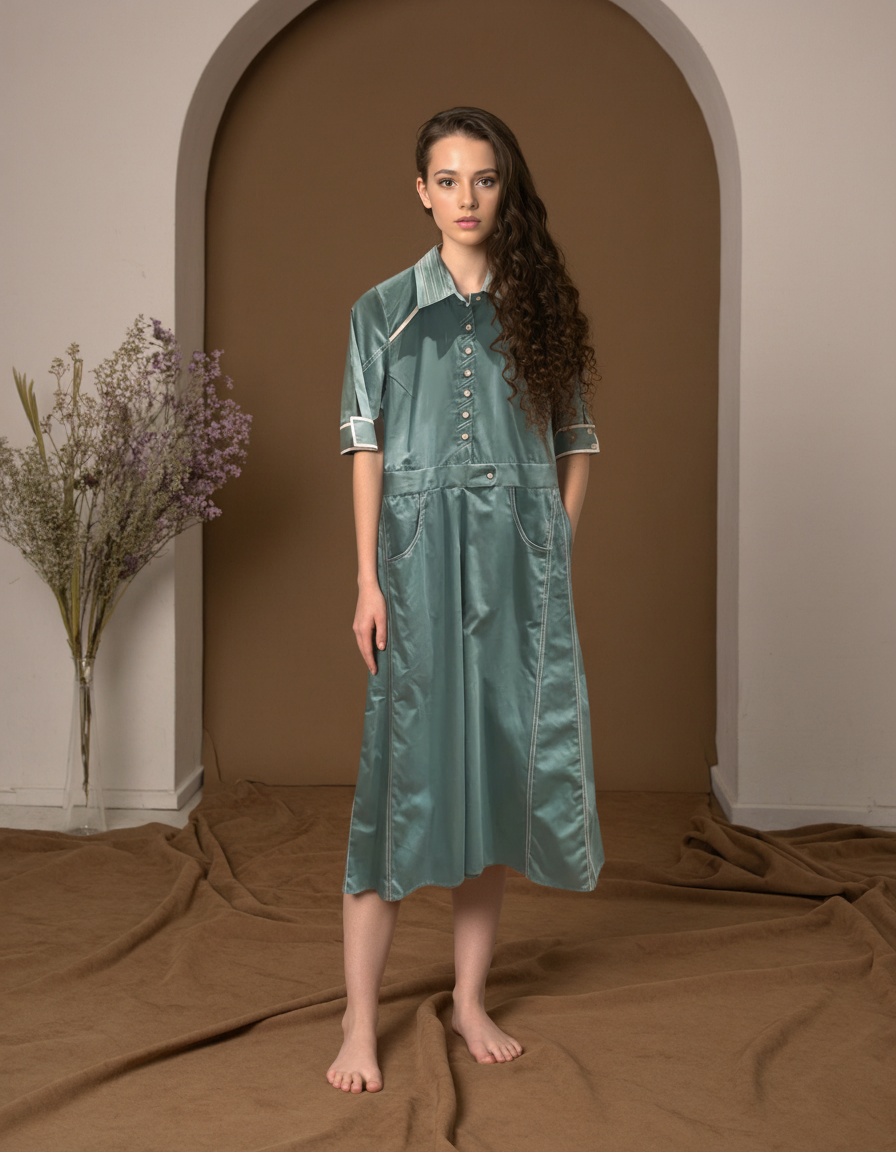

Generated Text for red dress:
Here is the e-commerce fashion photo you requested, with the woman wearing the red dress: 

Generated Image for red dress saved to: ./generated-images/model_wearing_red_dress_cand0_part1.png


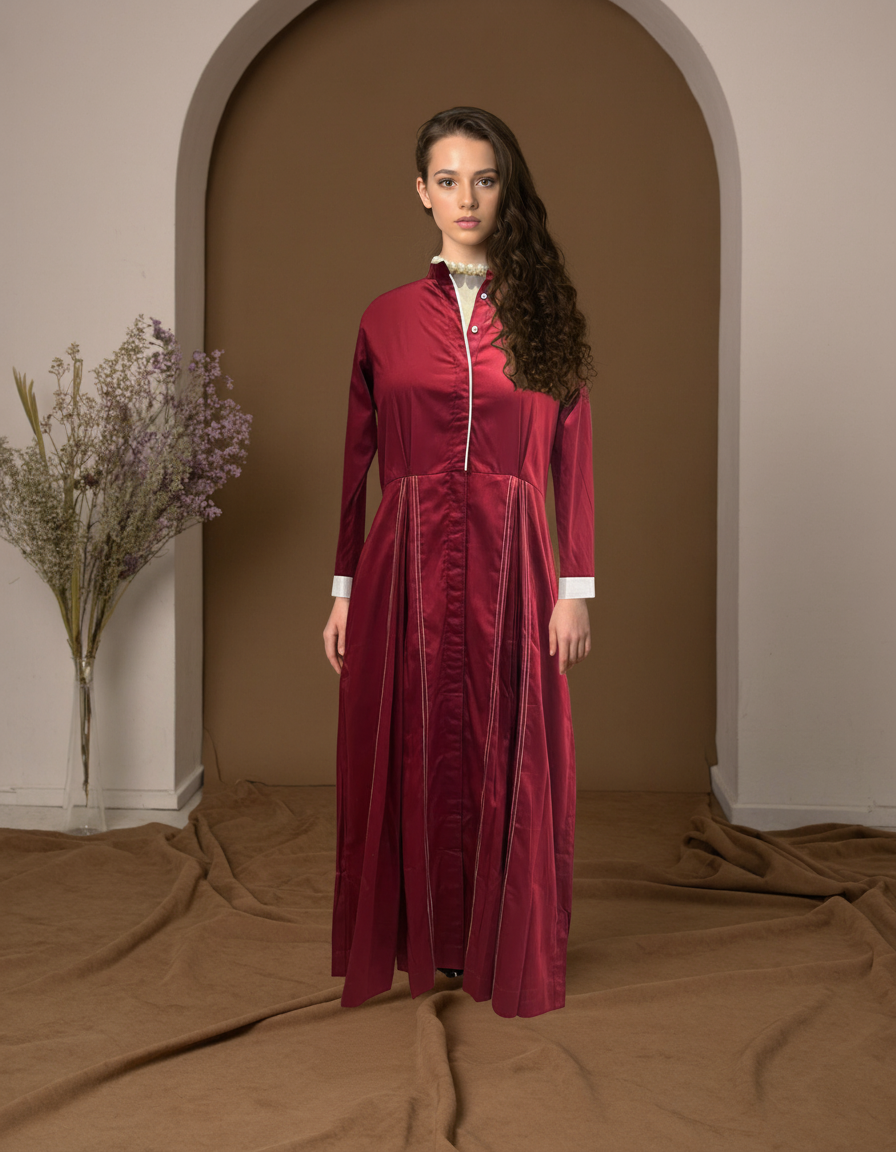

In [24]:
# Ensure output directory exists
output_dir = "./generated-images"
os.makedirs(output_dir, exist_ok=True)

# Loop over each dress to generate, save, and display
for color, dress_part in dresses:
    # Customize prompt for this dress
    prompt = prompt_template.format(color=color)

    # Define contents for this generation
    contents = [
        types.Content(
            role="user",
            parts=[
                types.Part.from_text(text=prompt),
                dress_part,  # Dress image
                model_part,  # Model image
            ]
        )
    ]

    # Generate content (synchronous non-streaming)
    response = client.models.generate_content(
        model=model,
        contents=contents,
        config=generate_content_config,
    )

    # Handle text output (optional)
    if response.text:
        print(f"Generated Text for {color} dress:")
        print(response.text)

    # Handle image(s): Loop over candidates and parts (in case of multiple)
    image_found = False
    for cand_idx, candidate in enumerate(response.candidates):
        for part_idx, part in enumerate(candidate.content.parts):
            if hasattr(part, "inline_data") and part.inline_data and part.inline_data.data:
                image_found = True
                mime_type = part.inline_data.mime_type
                data_buffer = part.inline_data.data  # Binary blob data
                file_extension = mimetypes.guess_extension(mime_type) or ".png"
                output_file = os.path.join(output_dir, f"model_wearing_{color}_dress_cand{cand_idx}_part{part_idx}{file_extension}")

                # Save the image
                with open(output_file, "wb") as f:
                    f.write(data_buffer)
                print(f"\nGenerated Image for {color} dress saved to: {output_file}")

                # Display the image in IPython
                display(Image(filename=output_file))
    if not image_found:
        print(f"\nNo image generated for {color} dress.")